# Two-body Problem

This notebook will solve the two-body problem on a two-dimensional plane in Cartesian coordinates.

Created by: Robert Von Holle. Last edited: 4/29/21.

Suppose two bodies of mass $m_1$ and $m_2$ orbit each other in a two-dimensional plane. Their positions at any given time can be expressed as the coordinates ($x_1, y_1$) and ($x_2, y_2$) where $x_1, x_2, y_1$, and $y_2$ are each functions of time (t). These functions can be determined through the Lagrangian of the system.

The total kinetic energy of the system is:

$T = \frac{1}{2} m_1 (\dot x_1^2 + \dot y_1^2) + \frac{1}{2} m_2 (\dot x_2^2 + \dot y_2^2)$

and the total potential energy of the system is:

$U = \frac{-G m_1 m_2}{r_{1,2}}$

where G is the gravitational constant and $r_{1,2}$ is the distance between the two bodies. This distance can be expressed as:

$r_{1,2} = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$.

Therefore, the potential energy of the system can be expressed in terms of $x_1, x_2, y_1$ and $y_2$ as:

$U = \frac{-G m_1 m_2}{\sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}}$.

Thus, the full Lagrangian $\mathcal{L} = T - U$ of the system is:

$\mathcal{L} = \frac{1}{2} m_1 (\dot x_1^2 + \dot y_1^2) + \frac{1}{2} m_2 (\dot x_2^2 + \dot y_2^2)
+ \frac{G m_1 m_2}{\sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}}$.

By applying the Euler-Lagrange equations and solving for $\ddot x_1, \ddot y_1, \ddot x_2$, and $\ddot y_2$, we obtain the following second-order differential equations:

$\ddot x_1 = \frac{G m_2 (x_2 - x_1)}{[(x_2 - x_1)^2 + (y_2 - y_1)^2]^{3/2}} \\
\ddot y_1 = \frac{G m_2 (y_2 - y_1)}{[(x_2 - x_1)^2 + (y_2 - y_1)^2]^{3/2}} \\
\ddot x_2 = \frac{-G m_1 (x_2 - x_1)}{[(x_2 - x_1)^2 + (y_2 - y_1)^2]^{3/2}} \\
\ddot y_2 = \frac{-G m_1 (y_2 - y_1)}{[(x_2 - x_1)^2 + (y_2 - y_1)^2]^{3/2}}$

## Now let's actually code it.

Below is a modification of the LagrangianPendulum class from the notebook Lagrangian_pendulum adapted for use for the two-body problem.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

In [3]:
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 12
plt.rcParams.update({'font.size': font_size})

In [4]:
class GravitationalOrbit():
    """
    Orbit class implements the parameters and Lagrange's equations for 
     a simple two-body problem.
     
    Parameters
    ----------
    m1 : float
        The mass of the first body
    m2 : float
        The mass of the second body
    G : float
        The gravitational constant

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, m1=1., m2=1., G=1.
                ):
        self.m1 = m1
        self.m2 = m2
        self.G = G
    
    def dz_dt(self, t, z):
        """
        This function returns the right-hand side of the diffeq: 
        [dz/dt d^2z/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            An 2-component vector with 
            z[0] = x1(t), z[1] = dx1/dt,
            z[2] = y1(t), z[3] = dy1/dt,
            z[4] = x2(t), z[5] = dx2/dt,
            z[6] = y2(t), z[7] = dy2/dt
            
        Returns
        -------
        
        """
        r12 = np.sqrt((z[4] - z[0])**2 + (z[6] - z[2])**2)
        x1_ddot = self.G*self.m2*(z[4] - z[0])/(r12**3)
        y1_ddot = self.G*self.m2*(z[6] - z[2])/(r12**3)
        x2_ddot = - self.G*self.m1*(z[4] - z[0])/(r12**3)
        y2_ddot = - self.G*self.m1*(z[6] - z[2])/(r12**3)
        
        return [z[1], x1_ddot, z[3], y1_ddot, z[5], x2_ddot, z[7], y2_ddot] 
    
    def solve_ode(self, t_pts, z_0, 
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """ 
        solution = solve_ivp(self.dz_dt, (t_pts[0], t_pts[-1]), 
                             z_0, t_eval=t_pts, method = 'RK23',
                             atol=abserr, rtol=relerr)
        x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = solution.y

        return x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot

Next is the generic plotting function and the start/stop indices taken from the same notebook.

In [5]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Plot the orbits

In [6]:
# Labels for individual plot axes
x_vs_time_labels = (r'$t$', r'$x(t)$')
y_vs_time_labels = (r'$t$', r'$y(t)$')
x_vs_y_labels = (r'$x$', r'$y$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 10.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Set up general parameters
G = 1.
m1 = 1.
m2 = 10.

# Instantiate an orbit system 
o1 = GravitationalOrbit(m1=m1, m2=m2, G=G)

We want to be very careful setting up initial conditions here. Specifically, we want the initial velocity of the center of mass to be zero, or else the whole system will translate itself somewhere else.

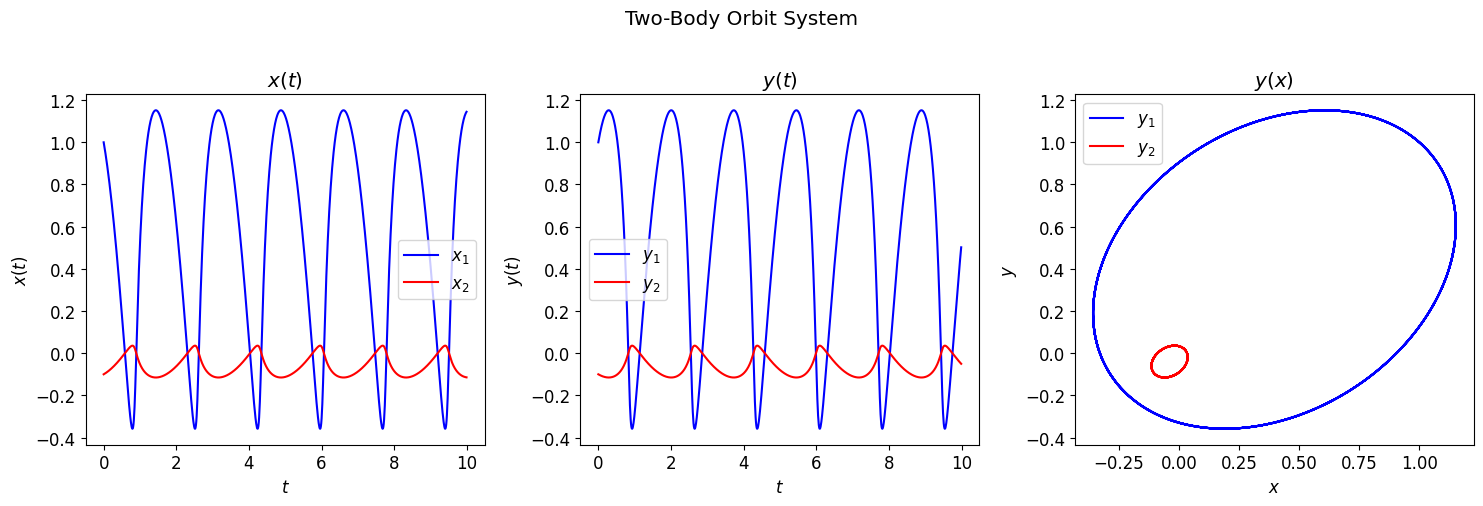

In [7]:
# Initial conditions
x1_0 = 1.
x1_dot_0 = -1.
y1_0 = 1.
y1_dot_0 = 1.
x2_0 = -(m1 / m2)*x1_0
x2_dot_0 = -(m1 / m2)*x1_dot_0
y2_0 = -(m1 / m2)*y1_0
y2_dot_0 = -(m1 / m2)*y1_dot_0

# Solve the ODE
z_0 = [x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0]
x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = o1.solve_ode(t_pts, z_0)

# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Two-Body Orbit System'
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi plot 
ax_a = fig.add_subplot(1,3,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], x1[start : stop], 
            axis_labels=x_vs_time_labels, 
            color='blue',
            label=r'$x_1$', 
            title=r'$x(t)$', 
            ax=ax_a)   
plot_y_vs_x(t_pts[start : stop], x2[start : stop], 
            axis_labels=x_vs_time_labels, 
            color='red',
            label=r'$x_2$', 
            title=r'$x(t)$', 
            ax=ax_a)
                              
# second plot: phi_dot plot 
ax_b = fig.add_subplot(1,3,2)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], y1[start : stop], 
            axis_labels=y_vs_time_labels, 
            color='blue',
            label=r'$y_1$', 
            title=r'$y(t)$', 
            ax=ax_b) 
plot_y_vs_x(t_pts[start : stop], y2[start : stop], 
            axis_labels=y_vs_time_labels, 
            color='red',
            label=r'$y_2$', 
            title=r'$y(t)$', 
            ax=ax_b)    

# third plot: state space plot from t=30 to t=50   
ax_c = fig.add_subplot(1,3,3)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x1[start : stop], y1[start : stop], 
            axis_labels=x_vs_y_labels, 
            color='blue',
            label=r'$y_1$', 
            title=r'$y(x)$', 
            ax=ax_c)
plot_y_vs_x(x2[start : stop], y2[start : stop], 
            axis_labels=x_vs_y_labels, 
            color='red',
            label=r'$y_2$', 
            title=r'$y(x)$', 
            ax=ax_c)    

fig.tight_layout()

Now let us see what happens if one mass is much larger than the other.

In [18]:
# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 20.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Set up general parameters
G = 1.
m1 = 1.
m2 = 100.

# Instantiate an orbit system 
o2 = GravitationalOrbit(m1=m1, m2=m2, G=G)

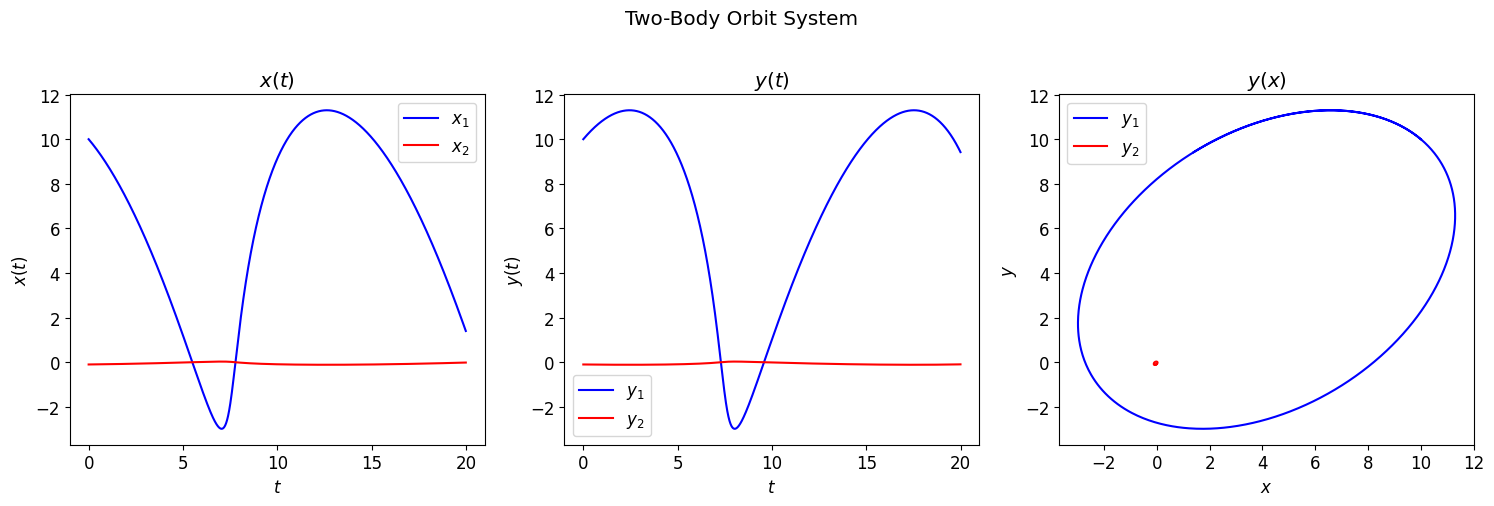

In [19]:
# Initial conditions
x1_0 = 10.
x1_dot_0 = -1.
y1_0 = 10.
y1_dot_0 = 1.
x2_0 = -(m1 / m2)*x1_0
x2_dot_0 = -(m1 / m2)*x1_dot_0
y2_0 = -(m1 / m2)*y1_0
y2_dot_0 = -(m1 / m2)*y1_dot_0

# Solve the ODE
z_0 = [x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0]
x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = o2.solve_ode(t_pts, z_0)

# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Two-Body Orbit System'
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi plot 
ax_a = fig.add_subplot(1,3,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], x1[start : stop], 
            axis_labels=x_vs_time_labels, 
            color='blue',
            label=r'$x_1$', 
            title=r'$x(t)$', 
            ax=ax_a)   
plot_y_vs_x(t_pts[start : stop], x2[start : stop], 
            axis_labels=x_vs_time_labels, 
            color='red',
            label=r'$x_2$', 
            title=r'$x(t)$', 
            ax=ax_a)
                              
# second plot: phi_dot plot 
ax_b = fig.add_subplot(1,3,2)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], y1[start : stop], 
            axis_labels=y_vs_time_labels, 
            color='blue',
            label=r'$y_1$', 
            title=r'$y(t)$', 
            ax=ax_b) 
plot_y_vs_x(t_pts[start : stop], y2[start : stop], 
            axis_labels=y_vs_time_labels, 
            color='red',
            label=r'$y_2$', 
            title=r'$y(t)$', 
            ax=ax_b)    

# third plot: state space plot from t=30 to t=50   
ax_c = fig.add_subplot(1,3,3)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x1[start : stop], y1[start : stop], 
            axis_labels=x_vs_y_labels, 
            color='blue',
            label=r'$y_1$', 
            title=r'$y(x)$', 
            ax=ax_c)
plot_y_vs_x(x2[start : stop], y2[start : stop], 
            axis_labels=x_vs_y_labels, 
            color='red',
            label=r'$y_2$', 
            title=r'$y(x)$', 
            ax=ax_c)    

fig.tight_layout()

This is a pretty standard Kepler orbit. No surprise here.